In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from scipy.stats import shapiro,normaltest,kstest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sanskriti\S.python\Datasets\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

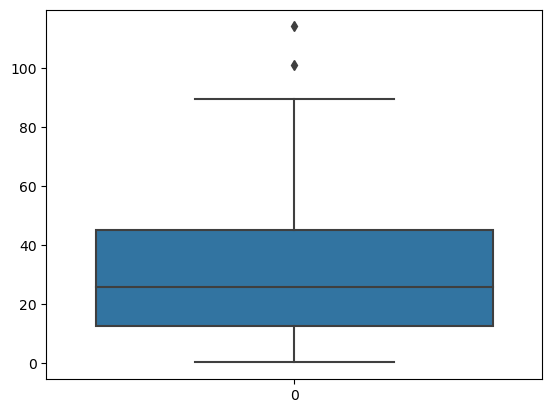

In [11]:
sns.boxplot(df["Newspaper"])

# Feature Engineering

In [13]:
def Handling_outlier1(df_tel,columns):
    for column in columns:
            q1 = df_tel[column].quantile(0.25)
            q3 = df_tel[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df_tel[column] = df_tel[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["TV","Radio","Newspaper"]

Handling_outlier1(df,columns)

-142.29999999999998
435.5
-29.849999999999994
76.35
-35.775000000000006
93.625


<Axes: >

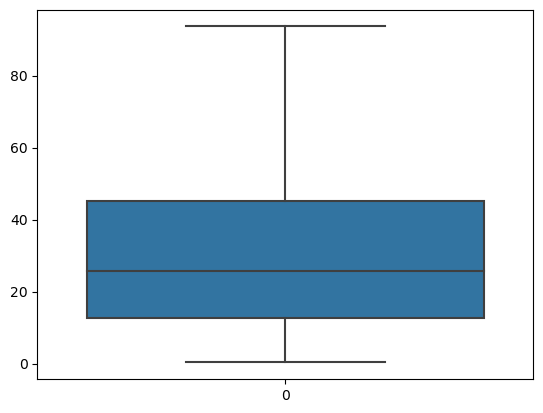

In [14]:
sns.boxplot(df["Newspaper"])

# Feature Selection

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059325,0.901208
Radio,0.054809,1.000000,0.355953,0.349631
Newspaper,0.059325,0.355953,1.000000,0.160959
Sales,0.901208,0.349631,0.160959,1.000000


<Axes: >

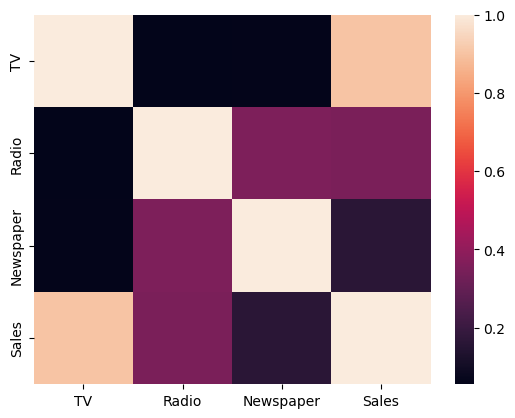

In [16]:
sns.heatmap(df.corr())

In [19]:
x=df.iloc[:,:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
y=df["Sales"]

# Model Training

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2)

In [25]:
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [26]:
lin_reg_model = lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

<Axes: ylabel='Sales'>

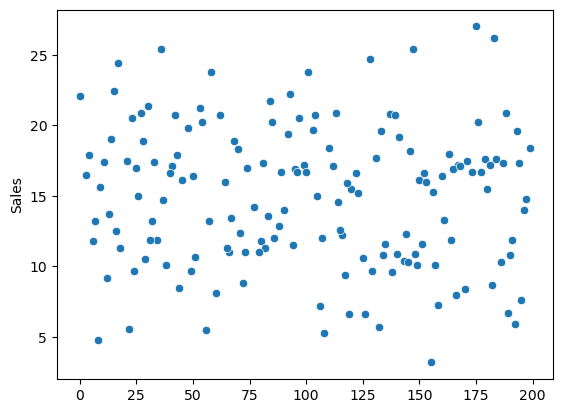

In [28]:
sns.scatterplot(ytrain)

In [30]:
ytrain_predict = lin_reg_model.predict(xtrain)

In [31]:
residual_train=ytrain-ytrain_predict

190   -0.576386
7     -0.146048
26    -0.616182
138   -0.287496
58     2.373697
         ...   
113    2.658542
64    -0.432024
15     2.026330
125   -0.110011
9     -0.141613
Name: Sales, Length: 160, dtype: float64

<Axes: xlabel='Sales', ylabel='Density'>

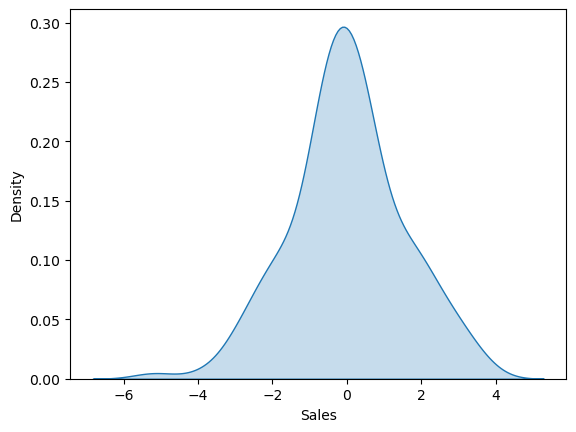

In [32]:
sns.kdeplot(residual_train,fill=True)

In [33]:
p_val,stats=shapiro(residual_train) # By shapiro test

In [34]:
if p_val>=0.5:
    print("Null hypothesis H0 is true")
    print("Data is distributed normally")
else:
    print("Alternate hypothesis H1 is true")
    print("Data is not distributed normally")

Null hypothesis H0 is true
Data is distributed normally


In [35]:
p_val,stats=normaltest(residual_train) # By normal test
p_val,stats=normaltest(residual_train)
if p_val>=0.5: 
    print("Null hypothesis H0 is true")
    print("Data is distributed normally")
else:
    print("Alternate hypothesis H1 is true")
    print("Data is not distributed normally")

Null hypothesis H0 is true
Data is distributed normally


In [36]:
p_val,stats=kstest(residual_train,"norm") # By ks test
if p_val>=0.5: 
    print("Null hypothesis H0 is true")
    print("Data is distributed normally")
else:
    print("Alternate hypothesis H1 is true")
    print("Data is not distributed normally")

Alternate hypothesis H1 is true
Data is not distributed normally


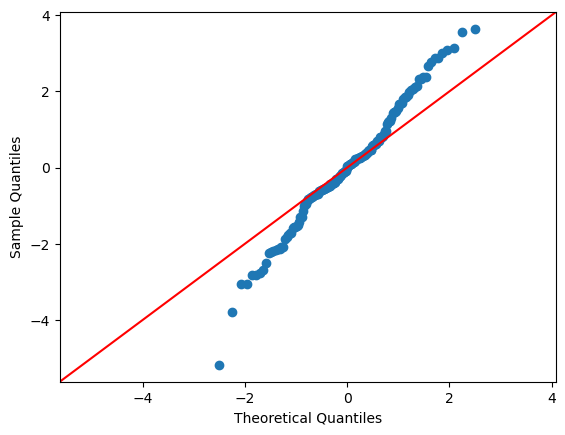

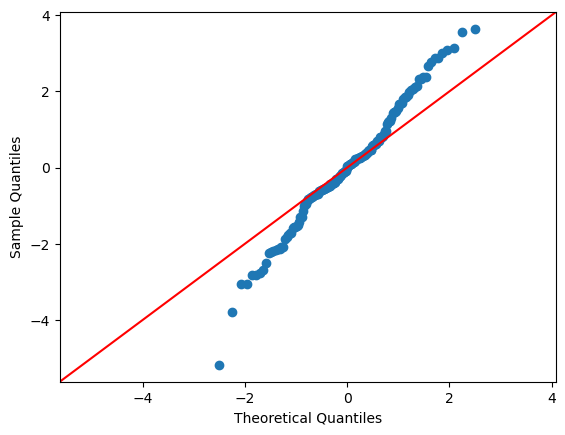

In [37]:
import statsmodels.api as sm
sm.qqplot(residual_train,line="45")

In [38]:
print("**********Model Evaluation on Training Data**********")
mse=mean_squared_error(ytrain,ytrain_predict)
print("       Mean Squared Error=",mse)
print(53*"*")
mae=mean_absolute_error(ytrain,ytrain_predict)
print("       Mean Absolute Error=",mae)
print(53*"*")
rmse=np.sqrt(mse)
print("       Root Mean Squared Error=",mse)
print(53*"*")
r2score=r2_score(ytrain,ytrain_predict)
print("             r2_score=",r2score)
print(53*"*")

**********Model Evaluation on Training Data**********
       Mean Squared Error= 2.280854171917676
*****************************************************
       Mean Absolute Error= 1.1525070190490485
*****************************************************
       Root Mean Squared Error= 2.280854171917676
*****************************************************
             r2_score= 0.9070809730598617
*****************************************************


In [39]:
ytest_predict = lin_reg_model.predict(xtest)

In [40]:
print("**********Model Evaluation on Testing Data**********")
mse=mean_squared_error(ytest,ytest_predict)
print("       Mean Squared Error=",mse)
print(53*"*")
mae=mean_absolute_error(ytest,ytest_predict)
print("       Mean Absolute Error=",mae)
print(53*"*")
rmse=np.sqrt(mse)
print("       Root Mean Squared Error=",mse)
print(53*"*")
r2score=r2_score(ytest,ytest_predict)
print("             r2_score=",r2score)
print(53*"*")

**********Model Evaluation on Testing Data**********
       Mean Squared Error= 4.44855200084654
*****************************************************
       Mean Absolute Error= 1.5748446762690165
*****************************************************
       Root Mean Squared Error= 4.44855200084654
*****************************************************
             r2_score= 0.888669842568984
*****************************************************
